In [1]:
# %load /Users/facai/Study/book_notes/preconfig.py
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
#sns.set(font='SimHei')
plt.rcParams['axes.grid'] = False

#from IPython.display import SVG
def show_image(filename, figsize=None, res_dir=True):
    if figsize:
        plt.figure(figsize=figsize)

    if res_dir:
        filename = './res/{}'.format(filename)

    plt.imshow(plt.imread(filename))

Chapter 8 Optimization for Training Deep Models
=========

optimization: finding the parameters $\theta$ of a neural network that significantly reduce a cost function $J(\theta)$.

### 8.1 How Learning Differs from Pure Optimization

expectation is taken across **the data generating distribution** $p_{data}$ rather than just over the finite training set:

\begin{equation}
    J^*(\theta) = \mathcal{E}_{(x, y) \sim p_{data}} L(f(x; \theta), y)
\end{equation}


#### 8.1.1 Empirical Risk Minimization

Rather than optimizing the risk direcly, we optimize the empirical risk, and hope that the risk decreases significantly as well.


#### 8.1.2 Surrogate Loss Functions and Early Stopping


#### 8.1.3 Batch and Minibatch Algorithms

Small batches can offer a regularing effect.

gradient can handle smaller batch size like 100, while second-order methods typically require much large batch sizes like 10,000.

minibatches must be selected randomly. For very large datasets, it is usually sufficient to shuffle the order of the dataset once and then store it in shuffled fashion.

On the second pass, the estimator becomes biased because it is formed by re-sampling values used before.

### 8.2 Challenges in Neural Network Optimization


#### 8.2.1 Ill-Conditioning

To determin whether ill-conditioning, one can monitor the squared gradient norm $g^T g$ and the $g^T H g$ term. In many cases, the gradient norm does not shrink significantly throughout learning, but the $g^T H g$ term grows by more than order of magnitude.


#### 8.2.2 Local Minima

model identifiability problem: models with latent variables are often not identifiable <= weight space symmetry.


#### 8.2.3 Plateaus, Saddle Points and Other Flat Regions

+ saddle point: local minimum along one cross-section, and local maximum along another another cross-section.
  - in higher dimensional spaces, local minima are rare and saddle points are more common.
  - difficult for newton's method, while easy for gradient descent.

+ maxima
+ wide, flat regions of constant value 


#### 8.2.4 Cliffs and Exploding Gradients

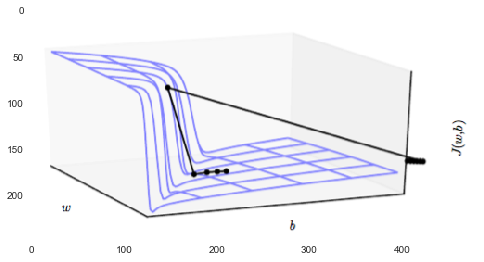

In [2]:
show_image("fig8_3.png")

can be avoided using the *gradient clipping* heuristic


#### 8.2.5 Long-Term Dependencies

when graph becomes extremely deep => vanishing and exploding gradient problem

Vanishing gradients make it difficult to know which direction the parameters should move to improve to the cost function, while exploding gradients can make learning unstable.


#### 8.2.6 Inexact Gradients


#### 8.2.7 Poor Correspondence between Local and Global Structure

Many existing research directions are aimed at finding good initial points, rather than developing algorithms that use non-local moves.


#### 8.2.8 Theoretical Limits of Optimization

### 8.3 Basic Algorithms


#### 8.3.1 Stochastic Gradient Descent

In practice, it is necessary to gradually decrease the learning rate over time.

In practice, it is common to decay the learning rate linearly until iteration $\tau$:

\begin{equation}
    \epsilon_k = (1 - \alpha) \epsilon_0 + \alpha \epsilon_{\tau}
\end{equation}

+ $\tau$: a few hundred passes through the training set
+ $\epsilon_\tau \approx 1\% \, \epsilon_0$
+ $\epsilon_0$: monitor the first several iterations and use a learning rate that is higher than the best-performing learning rate at this time, but not so high that it causes severe instability.

To study the convergence rate of an optimization algorithm, it is common to measure the *excess error* $J(\theta) - \min_\theta J(\theta)$.
+ SGD is applied to a convex problem: $O(\frac{1}{\sqrt{k}}$
+ in the stronly convex case it is $O(\frac{1}{k})$.


#### 8.3.2 Momentum

The momentum algorithm accumulates an exponentially decaying moving average of past gradients and continues to move in their direction.

\begin{align}
    v &\gets \alpha v - \epsilon \Delta_\theta \left ( \frac1{m} \displaystyle \sum^m_{i = 1} L \left ( f(x^{(i)}; \theta), y^{(i)} \right ) \right ) \\
    \theta &\gets \theta + v
\end{align}

The larger $\alpha$ is relative to $\epsilon$, the more previous gradients affect the current direction.

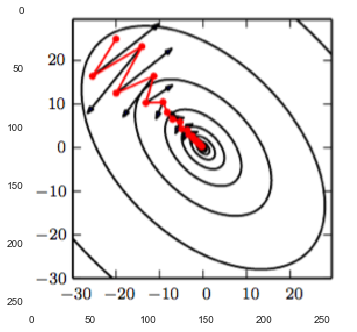

In [3]:
show_image("fig8_5.png")

the size of each step is $\frac{\epsilon \| g \|}{1 - \alpha} \implies$ it is thus helpful to think of the momentum hyperparameter in terms of $\frac1{1 - \alpha}$.

+ Common values of $\alpha$ used in practice include 0.5, 0.9 and 0.99.
+ Typically it begins with a small value and is later raised. 
+ It is less important to adapt $\alpha$ over time than to shrink $\epsilon$ over time.


#### 8.3.3 Nesterov Momentum

Nesterov momentum: the gradient is evaluated after the current velocity is applied.

\begin{align}
    v &\gets \alpha v - \epsilon \Delta_\theta \left ( \frac1{m} \displaystyle \sum^m_{i = 1} L \left ( f(x^{(i)}; \theta + \color{blue}{\alpha v}), y^{(i)} \right ) \right ) \\
    \theta &\gets \theta + v
\end{align}

考虑了提前量

### 8.4 Parameter Initialization Strategies

Designing improved initialization strategies is a difficult task because neural network optimization is not yet well understood.

A further difficulty is that some initial points may be benefical from the viewpoint of optimization but detrimental from the viewpoint of generalization.

complete certainty: break symmetry between different units

+ initialize each unit to compute a different function from all of the other units.
+ random initialization of the parameters.
  - Typically, set biases for each unit to heuristically chosen constants, and initilize only the weights randomly.

##### weight

We can think of initializing the parameters $\theta$ to $\theta_0$ as being similar to imposing a Gaussian prior $p(\theta)$ with mean $\theta_0$.    
$\implies$ choose $\theta_0$ to be near 0 = more likely that units do not interact with each other than that they do interact.

1. normalized initialization: $W_{i, j} \sim U \left ( - \frac{6}{\sqrt{m + n}}, \frac{6}{\sqrt{m + n}} \right )$
2. initializing to random orthogonal matrices
3. perserve norms
4. sparse initialization

A good rule of thumb for choosing the initial scales is to look at the range or standard deviation of activations or gradients on a single minibatch of data.

##### biase

1. Setting the biases to zero is compatible with most weight initialization schemes.
2. a few situations where we may set some biases to non-zero values:
   + for an output unit, often feneficial to initialize the bias to obtain the right marginal statistics of the output.
   + choose the bias to avoid causing too much saturation at initialization.    
     eg: set the bias of ReLU hidden unit to 0.1 rather than 0
   + Sometimes a unit controls whether other units are able to participate in a function => all units have a chance to learn.
   
##### initialize model parameters using machine learning

eg: to initialize a supervised model with the parameters learned by an unsupervised model trained on the same inputs.

### 8.5 Algorithms with Adaptive Learning Rates